# Test de trayectorias

In [1]:
# importar librerias
import time
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import BSpline, make_interp_spline 
import mujoco_py

from RobotEnv.tools.controllers import PID
from RobotEnv.tools import simulation
from RobotEnv.tools.controllers import Manipulator_Agent
from RobotEnv.tools.logger import Logger

import glfw


Creating window glfw
resuelto en: 292 pasos 0.584 seg
no se pudo alcanzar el target en: 2499 pasos 4.998 seg
no se pudo alcanzar el target en: 2499 pasos 4.998 seg
resuelto en: 402 pasos 0.804 seg
resuelto en: 118 pasos 0.23600000000000002 seg
resuelto en: 649 pasos 1.298 seg
MjSimState(time=1.300000000000001, qpos=array([-0.14126562,  1.99016962,  1.65687546,  0.67083724,  0.0332729 ,
       -2.9432287 ]), qvel=array([  0.75271784,  -0.37573298,   1.14907791,   1.75416142,
        -3.72526028, -14.57240066]), act=None, udd_state={})


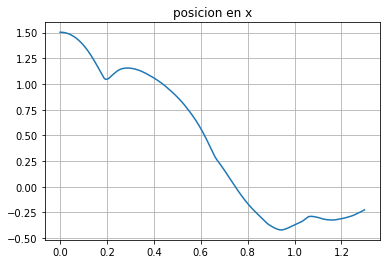

In [2]:
def main():
    #simulator
    sim = simulation.create_simulation("robotModelV2.xml")

    #controller
    controller = Manipulator_Agent("../agents/ddpg4/pyt_save/model.pt", sim, 4, render=True)

    # data recollector
    logger = Logger()

    position, qpos, control = controller.move_to(np.array([-0.3, 0.0, 0.5]), distance_threshold=0.05, timer=2500)

    position, qpos, control = controller.move_to(np.array([0.0, 0.3, 0.5]), distance_threshold=0.05, timer=2500)

    position, qpos, control = controller.move_to(np.array([0.0, 0.0, 0.5]), distance_threshold=0.05, timer=2500)

    position, qpos, control = controller.move_to(np.array([0.0, -0.2, 0.5]), distance_threshold=0.05, timer=2500)

    position, qpos, control = controller.move_to(np.array([-0.2, 0.0, 0.5]), distance_threshold=0.05, timer=2500)

    controller.reset()

    position, qpos, control = controller.move_to(np.array([-0.2, 0.0, 0.5]), distance_threshold=0.05, timer=2500)


    print(sim.get_state())


    x = [i*0.002 for i in range(len(position["pos_x"]))]
    time = [i*0.002 for i in range(len(qpos["base_link"]))]
    y = [i*0.002 for i in range(len(position["pos_y"]))]
    # z = [i*0.002 for i in range(len(position["pos_z"]))]
    error_a = [-0.4 for i in range(len(position["pos_y"]))]

    # logger.plot_trajectory(time, qpos["base_link"], grid=True, title=" accion de control")


    logger.plot_trajectory(x,  position["pos_x"], grid=True, title="posicion en x")
    # logger.plot_trajectory(y,  position["pos_y"], grid=True, title="posición en y")
    # logger.plot_trajectory(z,  position["pos_z"], grid=True)
    # logger.plot_error(y, error_a=position["pos_y"], error_b=error_a, grid=True)
    glfw.terminate()

main()